# <b>Django setup tutorial</b>

##### Using information available from the following <a href="https://www.youtube.com/watch?v=EuBQU_miReM&t=400s">YouTube video</a>

## Set up a virtual environment

Navigate to your folder you want to use the environment in using "cd", then create your virtual environment:


In [ ]:
Python -m venv .venv

# venv creates a virtual environment
# .venv makes a folder that is hidden by use of the .

Active the virtual environment

In [ ]:
. .venv/Scripts/activate

# use the . then .+the path to the 'activate file'

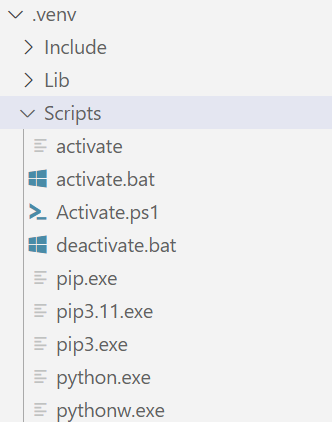

Now that the python envinronment is running, install the required dependencies

In [ ]:
pip install django

Useful tips

In [ ]:
# See the additional packages in the virtual environment
pip freeze

# Deactivate the current virtual environment
deactivate

## Create a django project

List all the available django commands - We're interested in startproject

In [ ]:
django-admin --help

Start the project, then this will create a 'movies' directory

In [ ]:
django-admin startproject movies .

# The . at the end signifies to make the file in the current directory

## Source control

Install git online from <a href="https://git-scm.com/download/win">git-csm.com</a>, then check it is working as shown below

In [ ]:
git --version

If this doesn't work, it may be necessary to add the following path to the path system variables

In [ ]:
C:\Program Files\Git\cmd\
C:\Program Files\Git\bin\

Make a new git repository

In [ ]:
git init

We want to only store the most essential files, so we need to create a file called .gitignore and on the first line, simply type .venv and this will then avoid that folder. The colour of the .venv directory should become grey.

It is advised to use a more indepth gitignore which can be found online from <a href="https://www.toptal.com/developers/gitignore/api/django">toptal</a>

Make our first committ through the terminal:

In [ ]:
# This adds the current directory
git add .

# Shows changes to be comitted
git status

# Makes the commit to github, it'll ask for email login
# Note -m signifies a message
git commit -m "Initial commit"


# This will show the commit history
git log

To fix this warning

*warning: in the working copy of 'setuptutorial.ipynb', LF will be replaced by CRLF the next time Git touches it*

In [ ]:
git config --global core.autocrlf false

Go to github and make a new repository so that we can commit straight to there from the command line

In [ ]:
git remote add origin https://github.com/EamonSaeid/LearnDjango.git
git branch -M main
git push -u origin main

## Understanding django

Django applications are structured in 3 main sections:

* Model
* View
* Template

<b>Model</b> - Representation of the data

<b>View</b> - Accepts requests and gets the appropriate data

<b>Template</b> - The visual page being sent to the client

## Hello world!

The admin page is already set up, see urls and you can see the admin site path and edit the paths for the site

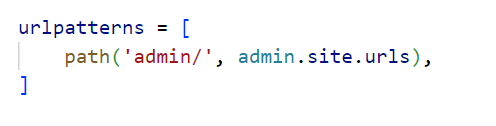

Lets see what is going on so far by running our server, then cmd click on the link

In [ ]:
python manage.py runserver
# ignore warnings about unapplied migrations for now

We can also add the admin path onto the local url they gave, but nothing will show since we've not added anything there yet

## Create a new path

We will create the movies path in the urls.py document, and this will retrieve a function from a new file we will create called views.py in the movies folder

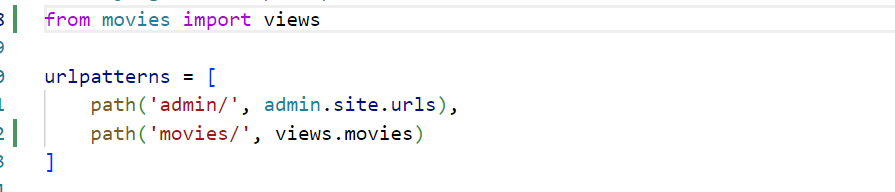

Add the code below to the views file. The movies function is imported from the views file inside the same folder, then sent as a http response when the /movies/ suffix is added to the local url

In [ ]:
from django.http import HttpResponse

def movies(request):
    return HttpResponse("Hello there")

Lets test we understand this by configuring the homepage

In [ ]:
# A path is added to the urls file to define the path for when there is no /xyz/ on the end of the url

urlpatterns = [
    path('admin/', admin.site.urls),
    path('movies/', views.movies),
    path('',views.home),
]


In [ ]:
# We add a function called home that is called when there is no suffix on the url

def home(request):
    return HttpResponse("Home Page")

The function works!

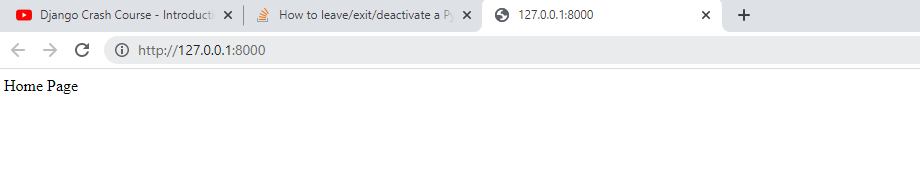


## Making our first template

We want our site to look a little prettier, we can do this by adding our template

In [ ]:
from django.shortcuts import render

def movies(request):
    return render(request, 'movies/movies.html',{'movies':['movie1','movie2']})

The render function will allow us to render our template. You can see we have to import it from django.shortcuts.

In [ ]:
render(request, 'movies/movies.html',{'movies':['movie1','movie2']})
# The syntax is render(request, html template path as a string, data to pass into the site)

Create a folder inside the movies folder called templates, inside there make a folder called movies, and inside there make a file called movies.html that the site will render

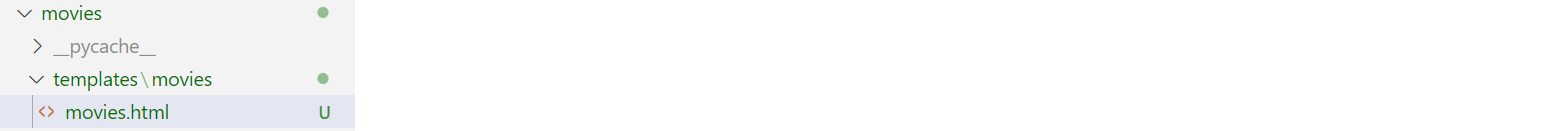

Inside this html file we can pass the data from the dictionary by calling the 'movies' inside two curly brackets as shown:

In [ ]:
{{movies}}

To allow django to find the template, a new app called movies must be added to the settings file as shown

In [ ]:
INSTALLED_APPS = [
    'movies',
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
]